[0 1 1 ... 1 1 1]
Accuracy: 100.00%


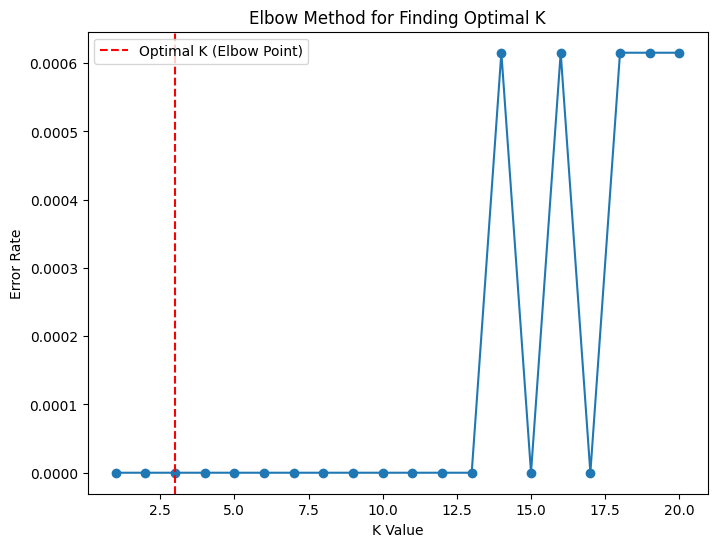

Accuracy: 99.94%


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("mushrooms.csv")

# Encode target
y = LabelEncoder().fit_transform(df['class'])
#print(y)
# One-hot encode features
X = OneHotEncoder(sparse=False).fit_transform(df.drop('class', axis=1))
#print(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN with Hamming distance (p=1, metric='hamming')
knn = KNeighborsClassifier(n_neighbors=3, metric='hamming')
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
k_values = range(1, 21)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()


print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


In [20]:
df = pd.read_csv("mushrooms.csv")
print(df.isnull())
for col in df.columns:
    if df[col].dtype == object and '?' in df[col].values:
        # Calculate the most common value, excluding '?'
        most_common = df[col][df[col] != '?'].mode()[0]
        # Replace '?' with the most common value
        df[col] = df[col].replace('?', most_common)

      class  cap-shape  cap-surface  cap-color  bruises   odor  \
0     False      False        False      False    False  False   
1     False      False        False      False    False  False   
2     False      False        False      False    False  False   
3     False      False        False      False    False  False   
4     False      False        False      False    False  False   
...     ...        ...          ...        ...      ...    ...   
8119  False      False        False      False    False  False   
8120  False      False        False      False    False  False   
8121  False      False        False      False    False  False   
8122  False      False        False      False    False  False   
8123  False      False        False      False    False  False   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0               False         False      False       False  ...   
1               False         False      False       False  ...   
2     

In [13]:
import numpy as np
from collections import Counter

# Sample dataset
data = np.array([
    [2.5, 2.4, 0], [0.5, 0.7, 0], [2.2, 2.9, 0], [1.9, 2.2, 0], [3.1, 3.0, 0],
    [7.2, 6.8, 1], [6.9, 7.1, 1], [6.2, 5.9, 1], [6.8, 6.1, 1], [7.5, 6.7, 1]
])
X, y = data[:, :2], data[:, 2]

# User input
x_test = np.array([3.0, 3.5])  # or accept input

# Euclidean distances
distances = np.linalg.norm(X - x_test, axis=1)

# KNN
k = 3
sorted_idx = np.argsort(distances)
neighbors = y[sorted_idx][:k]

# Majority voting
predicted_class = Counter(neighbors).most_common(1)[0][0]

# Output
print("Distances:", distances)
print("K Neighbors:", neighbors)
print("Predicted Class:", int(predicted_class))


Distances: [1.2083046  3.75366488 1.         1.70293864 0.50990195 5.34134814
 5.3075418  4.         4.60434577 5.52177508]
K Neighbors: [0. 0. 0.]
Predicted Class: 0
